In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

%matplotlib inline

In [1]:
! ls ../data 

breweries.csv  cb_2016_us_state_5m.zip	DC_shp	DC_shp.zip  nps  nps.zip


In [3]:
parks = gpd.read_file('../data/nps')

In [4]:
parks.head()

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,id,observed,geometry
0,2006/03/09,None,POC for this update: richard_menicke@nps.gov ...,None,None,None,GLAC,Glacier,National Park,1604373,None,"POLYGON ((-114.4755159847537 49.0009136904987,..."
1,None,None,Shifted 0.04 miles,None,None,None,CANY,Canyonlands,National Park,1604382,None,(POLYGON ((-109.8856200129457 38.4854254669334...
2,None,None,Shifted 0.06 miles,None,None,None,NOCA,North Cascades,National Park,1604517,None,(POLYGON ((-121.3776115871471 48.6357360079056...
3,2008/01/08,None,Lands,None,None,None,KOVA,Kobuk Valley,National Park,1604524,None,POLYGON ((-159.5027878412329 67.80979011213896...
4,2008/01/08,None,Lands,None,None,None,LACL,Lake Clark,National Park,1604526,None,(POLYGON ((-152.8508309821284 60.2380394475578...


In [6]:
olympic = parks[parks.UNIT_NAME == 'Olympic']

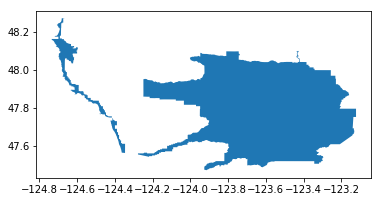

In [7]:
olympic.plot()

Text(449087,5.29429e+06,'Mt. Olympus')

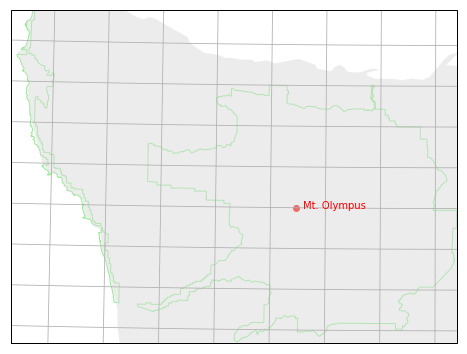

In [31]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = ccrs.UTM(10))
ax.add_geometries(olympic.geometry, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='lightgreen')  # lat-lon for coordinate reference system

bound = olympic.total_bounds
ax.set_extent([bound[0], bound[2], bound[1], bound[3]])
ax.gridlines()
# ax.add_feature(cf.COASTLINE)

land = cf.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='10m',
    facecolor=cf.COLORS['land_alt1'],
    alpha=0.5)
ax.add_feature(land)

ax.scatter(447087.3, 5294290.9, transform = ccrs.UTM(10), color='red')
ax.text(447087.3 + 2000, 5294290.9, "Mt. Olympus", transform = ccrs.UTM(10), color='red')

In [27]:
cf.COLORS

{'land': array([0.9375  , 0.9375  , 0.859375]),
 'land_alt1': array([0.859375, 0.859375, 0.859375]),
 'water': array([0.59375   , 0.71484375, 0.8828125 ])}